In [1]:
%matplotlib inline
# We need the line above to embed plots (graphics)
# in the notebook

# The line below imports the module pointy_game but
# renames it in this notebook to PointyGame
import PointyGame.pointy_game as PointyGame

# The line below imports all global variables,
# functions, and classes from the strategy module
# We will be using the different game playing strats
# for exercise 04
from PointyGame.strategy import *


# We need to import the creature
from PointyGame.creature import Creature

# Exercise 03B and 04: PointyGame

Objectives

* Demonstate an understanding of modules, classes, and functions
* Get practice reading someone else's code and documentation
* Practice method implementation
* Practice using 2-dimensional arrays
* Practice using the notebook (hint: you'll be restarting the kernel to reload the PointyGame module quite a bit as you progress in implementing the solution to the missing functions in the Creature class.
* Pratice testing your code



This exercise is spread across a couple lab sessions.  If you do not finish Exercise 03, you can use a solution I post before class on Wednesday to complete Exercise 04.

## Exercise 03B
For Exercise 03, I would like you to:
* Complete writing the Creature class in the PointyGame module by filling in the missing methods:
    * move_forward
    * rotate_left
    * rotate_right
    * is_alive
    * kill
* Follow the descriptions in the comments to implement these methods.
* Remove the `raise Exception(...)` code in the unimplemented methods -- I'm making the game crash if they're not implemented.
* Test your solution by putting a creature in a game and manipulating it by calling the appropriate `Creature` movement functions yourself.
* Add a cell at the bottom of this notebook that will play the PointyGame for 20 rounds using
    * The random strategy
    * The greedy strategy

## The Game class in the PointyGame module

This implements a grid-based game where in a creature moves between grid cells, collecting either poisons or food rewards.  The creature can only move forward in the direction it is facing; rotate left; rotate right; or chose to end the game.

Here is an overview of the gameboard
![gameboard](screenshot.png)

Movements have the following penalties:
* move_forward: -10
* rotate_left: -5
* rotate_right: -5

If a creature lands (or starts) on a cell with a "reward" or "poison" its score is altered.

Rewards (and poisons) are as follows:
* cherry: 100 points
* turnip: 50 points
* red poison: -100 points
* blue poison: -30 points

Rewards/poisons are randomly placed on the board.

If a creature goes outside the bounds of the board (into the water) it dies.

Gameplay ends if the creature gets a score below zero or the creature's play function tells the game to end.


See the cells below for an example of gameplay.  In short the process is:
1. Create an instance of PointyGame Creature
2. Create an instance of PointyGame Game
3. Call play(play_func) method on an instance of the game to play a single round of the game.
    * If this returns false the game is over.
    * Repeat calling the play method until the game ends.

## The Creature class in PointyGame module

The `Creature` class contains the information and methods for a creature to navigate the gameboard defined above.

A creature has a `score` which indicates how well it is doing in the game.  If the score is ever non-positive (so zero or less) then the creature "dies" and the game will end.

A creature dies in a number of ways: 
* It consumes too much "poison" without collecting food
* It makes too many moves without collecting food
* It falls off the gameboard into the "water" -- killing it instantly
    
The goal is for the creature to forage for food while avoiding cells that contain poison or falling off the edge of the world into the "water".

**For Exercise 03B, you will be finishing the Creature class by filling in the missing methods in the PointyGame module.**
    

## Gameplay functions

To play the game, a function is passed to the game's `play` method that tells the game how to make the next move.

Below are examples of these functions.

The gameplay functions take positional arguments for the game and the creature.  The game calls one of these methods during each round of play (it is passed to the play method) to determine how the creature moves.  Each function will return a single character string of either "F", "L", "R", or "X" as described in the PointyGame comments.  In short:
* F will move the creature forward one cell in the direction it is facing
* L will rotate the creature left 90 degrees
* R will rotate the creature right 90 degrees
* X will tell the game to end (for example, why play if there are no more rewards?)




In [2]:
# You may change this cell if you want to
# As you test your implementation of Creature's methods, you may wish to pass these functions
# as argumments into PointyGame's play() method to test your implementation.

def play_move_forward(game, creature):
    """
    Play always moves the creature forward
    """
    return 'F'

def play_rotate_left(game, creature):
    """
    Play always rotates the creature left
    """
    return 'L'

def play_rotate_right(game, creature):
    """
    Play always rotates the creature right
    """
    return 'R'

def play_exit(game, creature):
    """
    Play always ends the game
    """
    return 'X'

def play_randomly(game, creature):
    import numpy as np
    """
    Play will always randomly chose (with weight) from a rotation or movement option
    """
    possible_moves = ['F', 'L', 'R']
    return np.random.choice(possible_moves, p=[0.50, 0.25, 0.25])

def play_greedily(game, creature):
    """
    Play the game by trying to play a "greedy" strategy:
    that is try to examine the cell around the creature 
    and pick up points by orienting the creature toward
    the highest reward in its local cardinal area
    (cardinal directions only) and move to receive that 
    reward.
    """
    

## Examples of Game Play

In this example we're creating a world that is 5x5 cells in size and drawing the game board prior to playing.

This is the board before any gameplay.


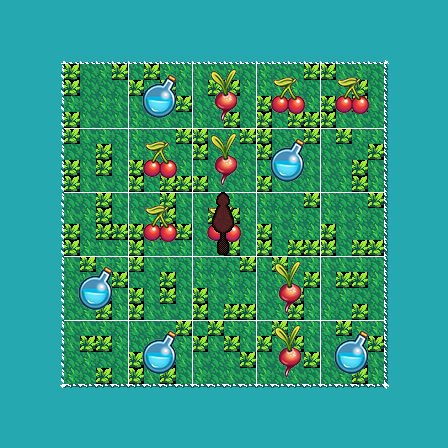

In [3]:
# This is an exmaple of initializing this game and displaying the current gameboard
world_size = (5,5)

# Our creature is going to start at position (2,2) in the world, facing "North"
creature = Creature(500, world_size, (2,2), init_facing='N')

# Create an instance of our game
game = PointyGame.Game(world_size, creature)

# Display our gameboard
print('This is the board before any gameplay.')
display(game.current_board)

Last Move: None
Current Score:  500


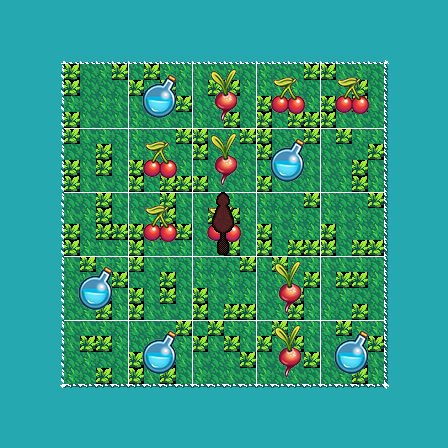

In [4]:
# We can always reset the game to the initial state of it by calling
# reset
game.reset()
print('Last Move:', game.last_move)
print('Current Score: ', creature.score)
display(game.current_board)

In [5]:
# We can see the list of lists that contains
# the points in each cell by looking at the 
# points matrix.
# Which values map to the different fruits / poisons?
game.points_matrix()

[[0, -30, 50, 100, 100],
 [0, 100, 50, -30, 0],
 [0, 100, 100, 0, 0],
 [-30, 0, 0, 50, 0],
 [0, -30, 0, 50, -30]]

In [6]:
# We can see where our creature is by looking at
creature.current_location

(2, 2)

In [7]:
# We can see our creature's score by looking at
creature.score

500

This is the board before any gameplay.


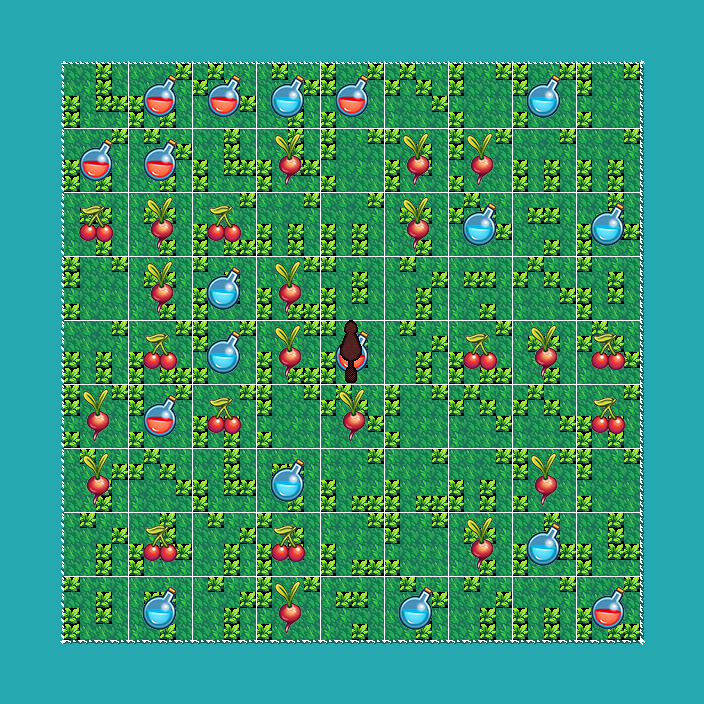

In [8]:
creature = Creature(1000, (9,9), (4,4), init_facing='N')
game = PointyGame.Game((9,9), creature)
print('This is the board before any gameplay.')
display(game.current_board)

In [10]:
import pandas as pd
creature = Creature(1000, (9,9), (4,4), init_facing='N')
game = PointyGame.Game((9,9), creature)
ex4_dict = {}
for func in [play_randomly, play_greedily, play_greedy_with_random]:
    for i in range(1,11):
        for j in range(1,51):
            game.play(func)
            if creature.score > 0:
                ex4_dict[str(func).split(" ")[1] + str(i) + str(j)] = pd.DataFrame([[str(func).split(" ")[1],
                                      i,
                                      j,
                                      creature.current_location[0],
                                      creature.current_location[1],
                                      creature.score]],
                                      columns = ["Treatment_Function","Replicate_Num","Ste_Num","X_Location","Y_Location","Score"])
            else:
                break
        creature.reset()

The creature is out of bounds!
The creature is out of bounds!
The creature is dead!
The creature is dead!
The creature is dead!
The creature is out of bounds!
The creature is dead!
The creature is dead!
The creature is dead!
The creature is dead!
The creature is dead!
The creature is dead!
The creature is dead!
The creature is out of bounds!
The creature is out of bounds!
The creature is dead!
The creature is dead!


In [12]:
pd.concat(ex4_dict).to_csv("tmp1.csv",index=False)

In [ ]:
creature = Creature(1000, (9,9), (4,4), init_facing='N')
game = PointyGame.Game((9,9), creature)